C:\Users\Aparajita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Aparajita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Aparajita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Aparajita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case 

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [

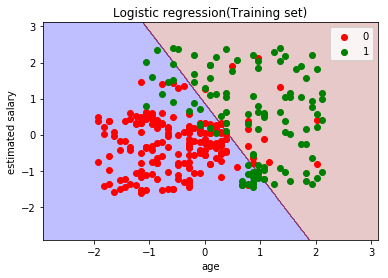

In [4]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
dataset=pd.read_csv("Social_Network_Ads.csv")
print(dataset.head())
x=dataset.iloc[:,[2,3]].values #iloc retrieves data from dataframe
y=dataset.iloc[:,4].values

# spliting dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)
print(x,y)
# featuring scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train)
print(x_test)

# fitting logistic regression to the trainer set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

# predicting the test set result
y_pred=classifier.predict(x_test)
x_pred=classifier.predict(x_train)
#print(y_pred)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=((cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,0]+cm[0,0]+cm[1,1]))
print(accuracy)

# visualising the training set results
from matplotlib.colors import ListedColormap
import numpy as np
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1, step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.25,cmap=ListedColormap(('blue','brown')))
# ravel() returns 1-D array
# alpha blends value between 0 (transparent) and 1 (opaque).
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic regression(Training set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
mse=mean_squared_error(y_test,y_pred)
print(mse)
    
    
    
    

C:\Users\Aparajita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aparajita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA v

[[11  0  0]
 [ 0 12  3]
 [ 0  0 12]]
0.9210526315789473
0.07894736842105263


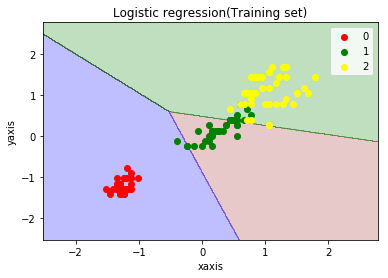

In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris 
import random

iris=load_iris()
#print(iris.keys())
ir=pd.DataFrame(iris.data)
ir[4]=iris.target
#print(ir.head(100))
#ir.columns=ir.feature_names
x=ir.iloc[:,[2,3]].values #iloc retrieves data from dataframe
y=ir.iloc[:,4].values

# spliting dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

# featuring scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#print(x_train)
#print(x_test)


from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

# predicting the test set result
y_pred=classifier.predict(x_test)
x_pred=classifier.predict(x_train)
#print(y_pred)

# fitting logistic regression to the trainer set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=((cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,0]+cm[0,1]+cm[0,2]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,0]+cm[2,1]+cm[2,2]))
print(accuracy)

# visualising the training set results
from matplotlib.colors import ListedColormap
import numpy as np
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1, step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.25,cmap=ListedColormap(('blue','brown','green')))
# ravel() returns 1-D array
# alpha blends value between 0 (transparent) and 1 (opaque).
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green','yellow'))(i),label=j)
plt.title('Logistic regression(Training set)')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend()
mse=mean_squared_error(y_test,y_pred)
print(mse)
    


C:\Users\Aparajita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0]
[[19  9]
 [ 4 31]]
0.7936507936507936
0.20634920634920634


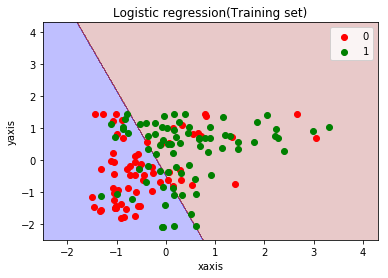

In [21]:

import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
dataset=pd.read_csv("sonar.csv")
#print(dataset.head())
x=dataset.iloc[:,[10,20]].values #iloc retrieves data from dataframe
y=dataset.iloc[:,60].values
#print(x,y)
for i in range(len(y)):
    if y[i]=='R':
        y[i]=0
    else:
        y[i]=1
y=y.astype('int')       
# spliting dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=12)

# featuring scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#print(x_train)
#print(x_test)

# fitting logistic regression to the trainer set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

# predicting the test set result
y_pred=classifier.predict(x_test)
x_pred=classifier.predict(x_train)
print(y_pred)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=((cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,0]+cm[0,0]+cm[1,1]))
print(accuracy)

# visualising the training set results
from matplotlib.colors import ListedColormap
import numpy as np
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1, step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.25,cmap=ListedColormap(('blue','brown')))
# ravel() returns 1-D array
# alpha blends value between 0 (transparent) and 1 (opaque).
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic regression(Training set)')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend()
mse=mean_squared_error(y_test,y_pred)
print(mse)
    


In [20]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_digits 
import random

digits=load_digits()
dg=pd.DataFrame(digits.data)
#x=dg.iloc[:,[3,4]].values#iloc retrieves data from dataframe
#x=digits.iloc[:,[10,20]].values 
x=digits.data
y=digits.target

# spliting dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=5)

# featuring scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#print(x_train)
#print(x_test)


from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

# predicting the test set result
y_pred=classifier.predict(x_test)
x_pred=classifier.predict(x_train)
#print(y_pred)

# fitting logistic regression to the trainer set
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
diag=sum1=0
for i in range(10):
    for j in range(10):
        sum1+=cm[i,j]
        if i==j:
            diag+=cm[i,j]
accuracy=diag/sum1
print(accuracy)
mse=mean_squared_error(y_test,y_pred)
print(mse)
print(y_test,y_pred)

C:\Users\Aparajita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aparajita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  1 47  0  1  0  0  1  0]
 [ 0  1  0  0 38  0  0  1  0  0]
 [ 0  0  0  0  0 56  0  0  0  1]
 [ 0  0  0  0  0  0 38  0  1  0]
 [ 0  0  0  1  0  0  0 56  0  1]
 [ 0  1  1  0  0  0  0  1 43  0]
 [ 0  0  0  0  0  2  0  0  1 42]]
0.9670781893004116
0.4279835390946502
[5 2 5 5 5 3 2 2 3 5 9 8 7 2 1 1 5 7 0 4 5 9 0 2 1 3 4 7 5 2 1 1 2 9 8 1 4
 5 4 9 5 5 6 0 1 7 2 9 7 7 3 9 5 1 6 6 7 7 8 1 6 1 3 6 1 3 2 6 8 1 4 7 1 6
 0 0 5 1 3 5 1 6 4 0 4 7 5 7 8 3 7 8 5 1 1 7 5 9 7 9 3 0 7 8 7 4 8 3 2 8 5
 2 7 4 4 8 9 7 4 5 0 5 9 8 2 3 2 4 4 8 0 5 2 9 4 8 6 5 9 7 8 0 9 4 3 8 7 5
 5 3 3 5 1 0 8 7 2 8 4 1 0 0 3 6 4 7 7 0 4 9 2 8 7 9 7 2 0 3 3 8 5 7 5 6 8
 4 1 5 1 1 6 9 9 9 8 6 4 6 0 1 6 5 3 9 0 2 7 8 8 7 3 8 3 9 3 0 9 6 0 4 0 3
 5 0 4 3 5 8 8 9 2 5 0 8 3 7 4 3 7 9 2 6 1 2 1 7 0 7 5 0 6 4 1 8 3 0 8 9 2
 2 5 2 6 6 3 4 0 7 1 5 3 8 7 3 4 2 5 1 3 0 0 9 3 8 8 3 9 8 6 6 2 6 7 5 3 1
 5 7 5 4 5 2 6 2 0 6 0 7 2 5 8 

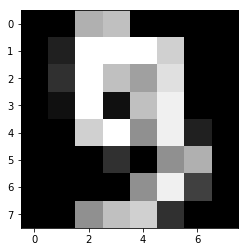

In [17]:
plt.imshow(np.reshape(digits.data[9],(8,8)),cmap=plt.cm.gray)